# DATA 1 : FIFA.CSV

In [37]:
#Import standard libraries
import pandas as pd
import warnings
import scipy.integrate as integrate
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

#Ignore warnings
warnings.filterwarnings('ignore')

#Load data
df = pd.read_csv("fifa.csv")

#  1. Data Visualization

## 1.1 Histogram 

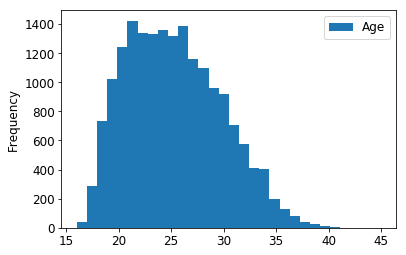

In [38]:
plt.rcParams.update({'font.size': 12}) #Adjust font size
df.plot(kind="hist", bins=30) #Create histogram with number of bins = 30

## 1.2 Boxplot

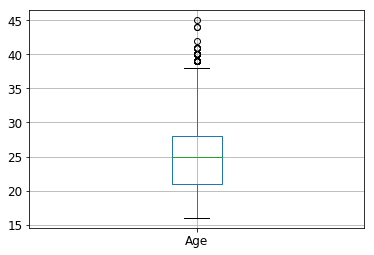

In [39]:
df.boxplot(column=['Age'])

# 2. Statistical Description

## 2.1 Minimum Value

In [40]:
df.min()

Name              A. Abang
Age                     16
Nationality    Afghanistan
dtype: object

## 2.2 Maximum Value

In [41]:
df.max()

Name           Óscar Whalley
Age                       45
Nationality         Zimbabwe
dtype: object

## 2.3 Mean

In [42]:
mean = df.mean()
mean

Age    25.122206
dtype: float64

## 2.4 Median

In [43]:
df.median()

Age    25.0
dtype: float64

## 2.5 Mode

In [44]:
df["Age"].mode()

0    21
dtype: int64

## 2.6 Variance

In [45]:
df.var()

Age    21.808365
dtype: float64

## 2.7 Standard Deviation

In [46]:
std = df.std()
std

Age    4.669943
dtype: float64

## 2.8 Data Skewness

In [47]:
df.skew()

Age    0.391764
dtype: float64

## 2.9 Data Kurtosis

In [48]:
df.kurt()+3

Age    2.540486
dtype: float64

# 3. Distribution Function Choice

### To choose probability distribution function, we will do these 3 steps :
1. Statistical Analysis
2. Visual Comparison
3. Using Kolmogorov Smirnov Test
4. Testing with Chi Squared Goodness of Fit Test with 95% confidence rate 

## 3.1 Visual Comparison

In [49]:
size = len(df)
x = scipy.arange(size) #create X axis
plt.figure(figsize=(25,25)) #create plot figure
plt.rcParams.update({'font.size': 20}) #update font
histogram = plt.hist(df["Age"], bins=30) #Plot histogram

#Distributions to be compared (determined heuristically)
dist_names = ['beta','norm','gamma']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(df["Age"])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,40)
plt.legend(loc='upper right')
plt.show()

### Based on observation, the Beta distribution fits the data best

In [50]:
#Plotting the Beta Distribution to the FIFA Dataset
plt.rcParams.update({'font.size': 12}) #update font
beta = st.beta(a,b,loc,scale)
h = sorted(np.array(df['Age']))
beta_pdf = beta.pdf(h)
plt.plot(h,beta_pdf,linewidth = 2)
plt.hist(df["Age"],density=1, bins = 30)
plt.title("Chosen Distribution Function")
plt.show()

NameError: name 'a' is not defined

## 3.2 Using Kolmogorov Smirnov Test Algorithm to fit distribution

In [ ]:
#For this case we shall be using the built in fit method from the scipy library
def get_best_distribution(data):
    dist_names = ["norm", "beta", "gamma"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

best_dist, p, params = get_best_distribution(df["Age"])
a,b,loc,scale = params

## 3.3 Using Chi-Squared Goodness to Fit Test for chosen distribution
1. H0 = Data fits the distribution
2. H1 = Data does not fit the distribution

In [ ]:
#Create beta distribution function with the parameters specified above in 3.2
beta = st.beta(a,b,loc,scale)

#Make function to find probability distribution
def FindProbability(X,func) :
    prob, error = integrate.quad(func.pdf,-np.inf,X)
    return prob, error


#Find observed values for each age 
observed = df["Age"].value_counts()

#Remove observed value that is < 5 (criteria for goodness to fit)
observed.sort_index(ascending=True)
for index in observed.index :
    if observed[index] < 5 :
        observed = observed.drop(index)
observed_sort = observed.sort_index(ascending=True)

#Find Degree of Freedom
DOF = observed.count() - 1


#Make series of expected values
expected = []
for index in observed_sort.index :
    expected.append(beta.pdf(index)*len(df))

#st.chisquare(np.array(observed_sort),f_exp=expected,ddof=DOF)
    
obsMinusExp = []
    
for a,b in zip(np.array(observed_sort),expected) :
    obsMinusExp.append(a-b)

result  = 0
for i in range(0,DOF+1) :
    result += pow(obsMinusExp[i],2)/expected[i]

#critical value for chi2 with ddof = DOF and apla = 0.05
criticalValue = 37.625
    
    
print("Found Chi2 value : {}".format(result))
print("Critical chi2 value : {}".format(criticalValue))
if(result>criticalValue) :
    print("H0 Rejected")
else :
    print("H0 Accepted")

### Based on the 4 steps above, we have chosen the Beta Distribution Function with the following Parameters :
1. Alpha = 2.485160112120321
2. Beta = 5.358773760119705

# 4. Dataset Specific Answer

### If given 1000 new players, what is the expected number of players with :

### A. Age below 22

In [ ]:
#Create beta distribution function with the parameters specified above distribution function
beta = st.beta(a,b,loc,scale)

In [ ]:
#Find Probability of player having age below 22 P(x<22)
probability, error = FindProbability(22.5,beta)
print("Probability of player having age below 22 is : {:.3f}".format(probability))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(probability * 1000)
print("Answer = {}".format(answer))


## Answer : Approximately 327 players are expected to be below 22 years old

### B. Age above  40

In [ ]:
#Find Probability of player having age above 40 P(x<22)
probability, error = FindProbability(39.5,beta)
probability = 1-probability
print("Probability of player having age above 40 is : {:.3f}".format(probability))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(probability * 1000)
print("Answer = {}".format(answer))

## Answer : Approximately 2 players are expected to be above 40 

In [ ]:
#Ignore warnings
warnings.filterwarnings('ignore')

#Load data
data = pd.read_csv('black_friday.csv',header=None)

# DATA 6 : emmision.CSV

In [ ]:
#Ignore warnings
warnings.filterwarnings('ignore')

#Load data
df = pd.read_csv("emission.csv", sep=";")

df.head()

In [ ]:
#Group Change Perioden to Period
df.Perioden = pd.Categorical(df.Perioden)
df["Perioden"] = df['Perioden'].str[:4]
df['total'] = df.CO2_1 + df.CH4_2 + df.N2O_3
print(df.head())

In [ ]:
#Memisahkan data menjdi sektor-sektor
list_of_sector = df["Bronnen"].unique()
print ("Sektor-sektor : ")
print(list_of_sector)

#  1. Data Visualization

## 1.1 Histogram (Untuk 3 Sector yang ditanya dalam soal)

In [ ]:
#Plotting untuk Sector T001176, Sector 305800 dan Sector 346700

Sector1 = df.loc[df['Bronnen'] == list_of_sector[0]]
Sector2 = df.loc[df['Bronnen'] == list_of_sector[3]]
Sector3 = df.loc[df['Bronnen'] == list_of_sector[5]]
#Drop Sources
Sector1 = Sector1.drop(["Bronnen","ID"],axis=1)


#cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
#dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
#activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]
plt.figure(figsize=(50,50))

fig, ax = plt.subplots(figsize=(30,10))
ax.bar(Sector1["Perioden"], Sector1["total"], label="Total Emmision")
#ax.plot(activity, cat, label="cat")
ax.legend()
plt.rcParams.update({'font.size': 20}) #update font
plt.title("Sector 1 : T001176 ")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(Sector2["Perioden"], Sector2["total"], label="Total Emmision")
#ax.plot(activity, cat, label="cat")
ax.legend()
plt.rcParams.update({'font.size': 20}) #update font
plt.title("Sector 2 : 305800 ")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(Sector3["Perioden"], Sector3["total"], label="Total Emmision")
#ax.plot(activity, cat, label="cat")
ax.legend()
plt.rcParams.update({'font.size': 20}) #update font
plt.title("Sector 3 : 346700 ")
plt.show()

## 1.2 Boxplot

# 2. Statistical Description

## 2.1 Minimum Value

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].min()))
print("Sector 2 : {}".format(Sector2["total"].min()))
print("Sector 3 : {}".format(Sector3["total"].min()))

## 2.2 Maximum Value

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].max()))
print("Sector 2 : {}".format(Sector2["total"].max()))
print("Sector 3 : {}".format(Sector3["total"].max()))

## 2.3 Mean Value

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].mean()))
print("Sector 2 : {}".format(Sector2["total"].mean()))
print("Sector 3 : {}".format(Sector3["total"].mean()))

## 2.4 Median Value

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].median()))
print("Sector 2 : {}".format(Sector2["total"].median()))
print("Sector 3 : {}".format(Sector3["total"].median()))

## 2.5 Mode Value

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].mode()))
print("Sector 2 : {}".format(Sector2["total"].mode()))
print("Sector 3 : {}".format(Sector3["total"].mode()))

## 2.6 Variance Value

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].var()))
print("Sector 2 : {}".format(Sector2["total"].var()))
print("Sector 3 : {}".format(Sector3["total"].var()))

## 2.7 Standard Deviation

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].std()))
print("Sector 2 : {}".format(Sector2["total"].std()))
print("Sector 3 : {}".format(Sector3["total"].std()))

## 2.8 Data Skewness

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].skew()))
print("Sector 2 : {}".format(Sector2["total"].skew()))
print("Sector 3 : {}".format(Sector3["total"].skew()))

## 2.9 Data Kurtosis

In [ ]:
print("Sector 1 : {}".format(Sector1["total"].kurt()))
print("Sector 2 : {}".format(Sector2["total"].kurt()))
print("Sector 3 : {}".format(Sector3["total"].kurt()))

# 3 Distribution Function Choice

## Because of the variability in gas emmision the distribution function choice will be determined in the next section

# 4. Dataset Specific Answer

### Predict in 10 years :

### ekspektasi total (untuksektor T001176) dari karbon dioksida, metana dan dinitrogen

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(Sector1["Perioden"], Sector1["CO2_1"], label="CO2_1")
#ax.plot(activity, cat, label="cat")
ax.legend()
plt.rcParams.update({'font.size': 20}) #update font
plt.title("Sector 1 : T001176 ")
plt.show()

### Chosen Distribution : Uniform Distribution

In [ ]:
print("Predicted Emmision : {}".format(Sector1["CO2_1"].mean()))

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(Sector1["Perioden"], Sector1["CH4_2"], label="CH4_2")
#ax.plot(activity, cat, label="cat")
ax.legend()
plt.rcParams.update({'font.size': 20}) #update font
plt.title("Sector 1 : T001176 ")
plt.show()

In [ ]:
print("Predicted Emmision : {}".format(Sector1["CH4_2"].mean()))

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(Sector1["Perioden"], Sector1["N2O_3"], label="N2O_3")
#ax.plot(activity, cat, label="cat")
ax.legend()
plt.rcParams.update({'font.size': 20}) #update font
plt.title("Sector 1 : T001176 ")
plt.show()

In [ ]:
print("Predicted Emmision : {}".format(Sector1["N2O_3"].mean()))

## Predict in 6 Years

### A. Ekspektasi Emisi dari Sektor 2

In [ ]:
print("Predicted Emmision : {}".format(Sector2["total"].mean()))

### B. Ekspektasi Emisi dari Sektor 3

In [ ]:
print("Predicted Emmision : {}".format(Sector3["total"].mean()))

In [ ]:
print("Confidence interval: ") 
print(st.uniform.interval(0.90,len(Sector1["total"])))


# DATA 3 : BLACK_FRIDAY.CSV

In [ ]:
#Import standard libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
import scipy.stats as st
import numpy as np

#Ignore warnings
warnings.filterwarnings('ignore')

#Load data
data = pd.read_csv('black_friday.csv',header=None)

#  1. Data Visualization

## 1.1 Histogram

In [ ]:
data.plot(kind='hist', bins=50, normed=True)

## 1.2 Boxplot

In [ ]:
data.boxplot()

# 2. Statistical Description
## 2.1 Minimum Value

In [ ]:
data.min()

## 2.2 Maximum Value

In [ ]:
data.max()

## 2.3 Mean

In [ ]:
mean = data.mean()
mean

## 2.4 Mode

In [ ]:
data.mode()

## 2.5 Median

In [ ]:
data.median()

## 2.6 Variance

In [ ]:
data.var()

## 2.7 Standard Deviation

In [ ]:
std = data.std()
std

## 2.8 Skewness

In [ ]:
data.skew()

## 2.9 Kurtosis

In [ ]:
data.kurtosis()

# 3. Distribution Function Choice

### To choose probability distribution function, we will do these 4 steps :
1. Statistical Analysis
2. Visual Comparison
3. Using Kolmogorov Smirnov Test
4. Testing with Chi Squared Goodness of Fit Test with 95% confidence rate 

## 3.1 Statistical Analysis

No probability distribution function could be inferred from statistical analysis based on the statistical description above.

## 3.2 Visual Comparison

In [ ]:
size = len(data)
x = scipy.arange(size) #create X axis
plt.figure(figsize=(17,17)) #create plot figure
histogram = plt.hist(data[0], bins=50, normed=True) #Plot histogram

#Distributions to be compared (determined heuristically)
dist_names = ['norm','gamma','beta','expon','lognorm','chi2','f','t']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data[0])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(-1000,25000)
    
plt.legend(loc='upper right')
plt.show()

## 3.3 Using Kolmogorov Smirnov Test Algorithm to find parameter

In [ ]:
#For this case we shall be using the built in fit method from the scipy library
def get_best_distribution(data):
    dist_names = ["f","gamma", "lognorm"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

best_dist, p, params = get_best_distribution(data[0])
d1, d2, loc, scale = params

## 3.4 Goodness to Fit Test

### Based on the 4 steps above, we have chosen the F Distribution Function with the following Parameters :
1. d1 = 2081540.92491396
2. d2 = 34.787435681562926

# 4. Dataset Specific Answer

## 4.1 Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:

### A. Miskin (total pembelian kurang dari 1000 dolar)

In [ ]:
#Create F distribution function with the parameters specified above distribution function
fdist = st.f(d1,d2,loc,scale)

#Find Probability of purchase below 1000 dollar P(x<1000.5)
prob, error = integrate.quad(fdist.pdf,-np.inf,1000.5)

print("Probability of purchase below 1000 dollar is : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 250)
print("Answer = {}".format(answer))

Expected number of people whose purchase is below 1000 dollar is 3

### B. Kaya (total pembelian lebih dari 10000 dolar)

In [ ]:
#Create F distribution function with the parameters specified above distribution function
fdist = st.f(d1,d2,loc,scale)

#Find Probability of purchase above 10000 dollar P(x>9999.5)
prob, error = integrate.quad(fdist.pdf,9999.5,np.inf)

print("Probability of purchase above 10000 dollar is : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 250)
print("Answer = {}".format(answer))

Expected number of people whose purchase is above 10000 dollar is 96

### C. Crazy Rich (total pembelian lebih dari 20000 dolar)

In [ ]:
#Create F distribution function with the parameters specified above distribution function
fdist = st.f(d1,d2,loc,scale)

#Find Probability of purchase above 20000 dollar P(x>19999.5)
prob, error = integrate.quad(fdist.pdf,19999.5,np.inf)

print("Probability of purchase above 20000 dollar is : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 250)
print("Answer = {}".format(answer))

Expected number of people whose purchase is above 20000 dollar is 9

## 4.2 Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:

### A. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [ ]:
#Create F distribution function with the parameters specified above distribution function
fdist = st.f(d1,d2,loc,scale)

#Find Probability of purchase between 1980 and 2000 (inclusive) dollar P(1979.5 < x < 2000.5)
prob, error = integrate.quad(fdist.pdf,1979.5,2000.5)

print("Probability of purchase between 1980 and 2000 (inclusive) dollar is : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 1000)
print("Answer = {}".format(answer))

### B. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [ ]:
#Create F distribution function with the parameters specified above distribution function
fdist = st.f(d1,d2,loc,scale)

#Find Probability of purchase between 2707 and 2897 (inclusive) dollar P(2706.5 < x < 2897.5)
prob, error = integrate.quad(fdist.pdf,2706.5,2897.5)

print("Probability of purchase between 2707 and 2897 (inclusive) dollar is : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 1000)
print("Answer = {}".format(answer))

# DATA 4 : CRYPTO.CSV

In [ ]:
#Import standard libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
import scipy.stats as st
import numpy as np

#Ignore warnings
warnings.filterwarnings('ignore')

#Load data
data = pd.read_csv('crypto.csv',header=None)

#  1. Data Visualization

## 1.1 Histogram

In [ ]:
data.plot(kind='hist', bins=30, normed=True, log=True)

## 1.2 Boxplot

In [ ]:
data.boxplot()

# 2. Statistical Description
## 2.1 Minimum Value

In [ ]:
data.min()

## 2.2 Maximum Value

In [ ]:
data.max()

## 2.3 Mean

In [ ]:
mean = data.mean()
mean

## 2.4 Mode

In [ ]:
data.mode()

## 2.5 Median

In [ ]:
data.median()

## 2.6 Variance

In [ ]:
data.var()

## 2.7 Standard Deviation

In [ ]:
std = data.std()
std

## 2.8 Skewness

In [ ]:
data.skew()

## 2.9 Kurtosis

In [ ]:
data.kurtosis()

# 3. Distribution Function Choice

### To choose probability distribution function, we will do these 4 steps :
1. Statistical Analysis
2. Visual Comparison
3. Using Kolmogorov Smirnov Test
4. Testing with Chi Squared Goodness of Fit Test with 95% confidence rate 

## 3.1 Statistical Analysis

No probability distribution function could be inferred from statistical analysis based on the statistical description above.

## 3.2 Visual Comparison

In [ ]:
size = len(data)
x = scipy.arange(size) #create X axis
plt.figure(figsize=(17,17)) #create plot figure
histogram = plt.hist(data[0], bins=30, normed=True, log=True) #Plot histogram

#Distributions to be compared (determined heuristically) 
dist_names = ['expon','norm','gamma','beta','lognorm','chi2','f','t']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data[0])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(-1000,2.5e6)
    plt.ylim(10e-16,10e-4)

plt.legend(loc='upper right')
plt.show()

## 3.3 Using Kolmogorov Smirnov Test Algorithm to find parameter

In [ ]:
#For this case we shall be using the built in fit method from the scipy library
def get_best_distribution(data):
    dist_names = ["lognorm","f","t"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

best_dist, p, params = get_best_distribution(data[0])
s, loc, scale = params

## 3.4 Goodness to Fit Test

### Based on the 4 steps above, we have chosen the lognormal distribution function with :
1. s = 4.5637676143335346

# 4. Dataset Specific Answer

## 4.1 Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya

### A. kurang dari 0.177013

In [ ]:
#Create lognormal distribution function with the parameters specified above distribution function
lndist = st.lognorm(s,loc,scale)

#Find Probability of cryptocurrency with valuation below 0.177013 P(x<0.177013)
prob, error = integrate.quad(lndist.pdf,-np.inf,0.177013)

print("Probability of cryptocurrency with valuation below 0.177013 : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 1000)
print("Answer = {}".format(answer))

Expected number of cryptocurrency data with valuation below 0.177013 is 699 data

### B. lebih dari 177.013

In [ ]:
#Create lognormal distribution function with the parameters specified above distribution function
lndist = st.lognorm(s,loc,scale)

#Find Probability of cryptocurrency with valuation above 177.013 P(x>177.013)
prob, error = integrate.quad(lndist.pdf,177.013,np.inf)

print("Probability of cryptocurrency with valuation above 177.013 : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

#Find Answer
answer = round(prob * 1000)
print("Answer = {}".format(answer))

Expected number of cryptocurrency data with valuation above 177.013 is 17 data

## 4.2 Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai

### A. lebih dari 0.013

In [ ]:
#Create lognormal distribution function with the parameters specified above distribution function
lndist = st.lognorm(s,loc,scale)

#Find Probability of cryptocurrency with valuation above 0.013 P(x>0.013)
prob, error = integrate.quad(lndist.pdf,0.013,np.inf)

print("Probability of cryptocurrency with valuation below 0.013 : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))

### B. kurang dari 17.7

In [ ]:
#Create lognormal distribution function with the parameters specified above distribution function
lndist = st.lognorm(s,loc,scale)

#Find Probability of cryptocurrency with valuation above 0.013 P(x>0.013)
prob, error = integrate.quad(lndist.pdf,-np.inf,17.7)

print("Probability of cryptocurrency with valuation below 17.7 : {:.3f}".format(prob))
print("with error of : {:.10f}".format(error))